In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
%pip install -r requirements.txt

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached flwr-1.4.0-py3-none-any.whl (157 kB)
  Using cached openml-0.13.1.tar.gz (127 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.0/910.0 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for openml: filename=openml-0.13.1-py3-none-any.whl size=142783 sha256=addb455c0cb3477d821e0a7c0db3e1cf747f9a8293586d711d36544a7bf91800
  Stored in directory: /Users/etienne/Library/Caches/pip/wheels/f7/7a/fa/f73edc5ccecbab13bbf5fb888f2f943720f77114a1fa4ceffe
Successfully built openml
  Attempting uninstall: flwr
    Found existing installation: flwr 1.5.0
    Uninstalling flwr-1.5.0:
      Successfully uninstalled flwr-1.5.0
  Attempting uninstall: openml
    Found existing installation: openml 0.14.1
    Uninstalling openml-0.14.1:
      Successfully uninstalled openml-0.14.1
Note: you may need to restart the kernel to use updated packa

In [3]:
# read csv data directory
data = pd.read_csv('data_0.csv')

In [4]:
# Specify the pattern to match CSV files (e.g., data_*.csv)
file_pattern = 'data_*.csv'

# Use glob to get a list of file names that match the pattern
file_list = glob.glob(file_pattern)

# Initialize an empty list to store DataFrames
data_frames = []

# Loop through the file names and read each CSV into a DataFrame
for file_name in file_list:
    df = pd.read_csv(file_name)
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)

In [5]:
display(combined_data)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:09,11,80010E600,11,80010E600,16.33,US Dollar,16.33,US Dollar,Reinvestment,0
1,2022/09/01 00:09,11,800329930,2776,800816450,335999.68,US Dollar,335999.68,US Dollar,Cheque,0
2,2022/09/01 00:24,11,8003289F0,249457,825F4B630,45.39,US Dollar,45.39,US Dollar,Credit Card,0
3,2022/09/01 00:17,11,800BAFE20,11,800BAFE20,1292.36,US Dollar,1292.36,US Dollar,Reinvestment,0
4,2022/09/01 00:00,32248,80056BBD0,11,800BAFE20,12373.74,US Dollar,12373.74,US Dollar,ACH,0
...,...,...,...,...,...,...,...,...,...,...,...
1727611,2022/09/16 23:56,4,81ACC8D40,279758,81F9B0520,3714.08,Ruble,3714.08,Ruble,Cheque,0
1727612,2022/09/16 23:34,4,8188FDC70,174268,82042DB00,126128.42,Ruble,126128.42,Ruble,Cheque,0
1727613,2022/09/16 23:49,4,8188FDC70,174268,82042DB00,116842.59,Ruble,116842.59,Ruble,Credit Card,0
1727614,2022/09/16 23:55,4,81D3361B0,277240,821E5E1E0,373939.50,Ruble,373939.50,Ruble,Cheque,0


In [6]:
# filter the data where column Is Laundering is 1
laundering_data = combined_data[combined_data['Is Laundering'] == 1]

In [7]:
display(laundering_data)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
4779,2022/09/06 08:26,7317,81EBF2320,11,81683A320,8377.46,US Dollar,8377.46,US Dollar,ACH,1
4970,2022/09/04 11:45,11,800155780,2408,80027E270,5746.43,Euro,5746.43,Euro,ACH,1
4972,2022/09/05 13:33,11,8003542E0,2408,80027E270,4424.62,Euro,4424.62,Euro,ACH,1
4973,2022/09/02 11:00,24528,80216DF70,11,801BA5360,6504.34,US Dollar,6504.34,US Dollar,ACH,1
5363,2022/09/03 16:26,1148,8009F5930,11,8000764B0,5906.84,US Dollar,5906.84,US Dollar,ACH,1
...,...,...,...,...,...,...,...,...,...,...,...
1721343,2022/09/16 11:25,72269,81A998150,4,81A998590,490534.13,Ruble,490534.13,Ruble,ACH,1
1722826,2022/09/16 14:17,70,100428780,4,817A96440,2630963.09,Rupee,2630963.09,Rupee,Cash,1
1722936,2022/09/19 11:59,4,80EFFBA60,63963,817DFAC70,892661.98,Rupee,892661.98,Rupee,ACH,1
1723988,2022/09/16 16:50,4,813415610,40850,813415660,218412.11,Yen,218412.11,Yen,ACH,1


In [20]:
# describe the laundering data and round to 2 decimal places
display(laundering_data.describe().round(2))

,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,2841.00,2841.00,2.841000e+03,2.841000e+03,2841.0
mean,42111.99,50341.55,2.572406e+07,2.572406e+07,1.0
std,188975.93,214256.22,8.203788e+08,8.203788e+08,0.0
min,0.00,0.00,1.000000e-02,1.000000e-02,1.0
25%,11.00,11.00,4.592320e+03,4.592320e+03,1.0
50%,20.00,27.00,1.077007e+04,1.077007e+04,1.0
75%,2470.00,9340.00,1.812274e+04,1.812274e+04,1.0
max,2181963.00,2217661.00,4.264106e+10,4.264106e+10,1.0


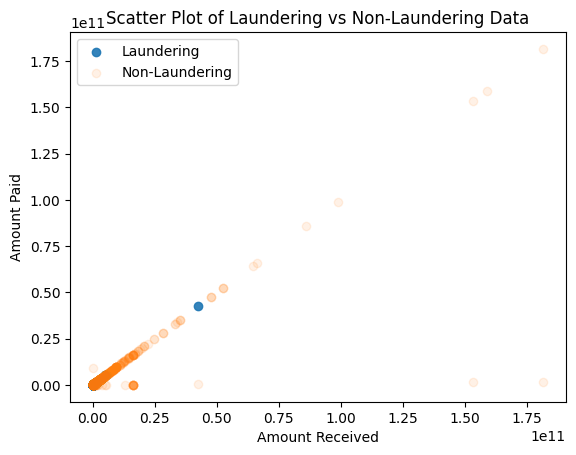

In [8]:
# Extract the relevant data
laundering_data = combined_data[combined_data['Is Laundering'] == True]
non_laundering_data = combined_data[combined_data['Is Laundering'] == False]

# Create the scatter plot
plt.scatter(laundering_data['Amount Received'], laundering_data['Amount Paid'], label='Laundering', alpha=0.9)
plt.scatter(non_laundering_data['Amount Received'], non_laundering_data['Amount Paid'], label='Non-Laundering', alpha=0.1)

# Add labels and legend
plt.xlabel('Amount Received')
plt.ylabel('Amount Paid')
plt.title('Scatter Plot of Laundering vs Non-Laundering Data')
plt.legend()

# Show the plot
plt.show()

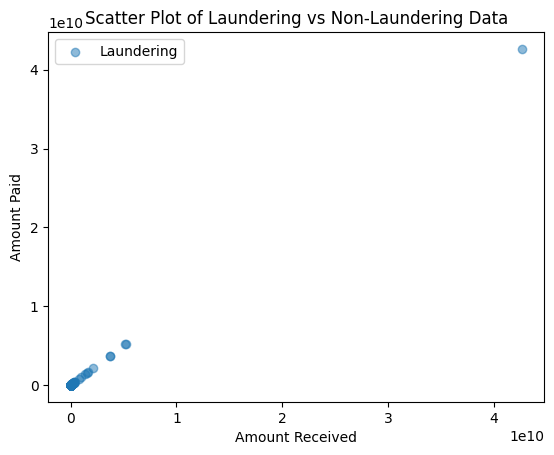

In [9]:
# Extract the relevant data
laundering_data = combined_data[combined_data['Is Laundering'] == 1]

# Create the scatter plot
plt.scatter(laundering_data['Amount Received'], laundering_data['Amount Paid'], label='Laundering', alpha=0.5)
# Add labels and legend
plt.xlabel('Amount Received')
plt.ylabel('Amount Paid')
plt.title('Scatter Plot of Laundering vs Non-Laundering Data')
plt.legend()

# Show the plot
plt.show()

(array([2.838e+03, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.09250000e-02, 4.26410649e+09, 8.52821299e+09, 1.27923195e+10,
        1.70564260e+10, 2.13205325e+10, 2.55846390e+10, 2.98487454e+10,
        3.41128519e+10, 3.83769584e+10, 4.26410649e+10]),
 <BarContainer object of 10 artists>)

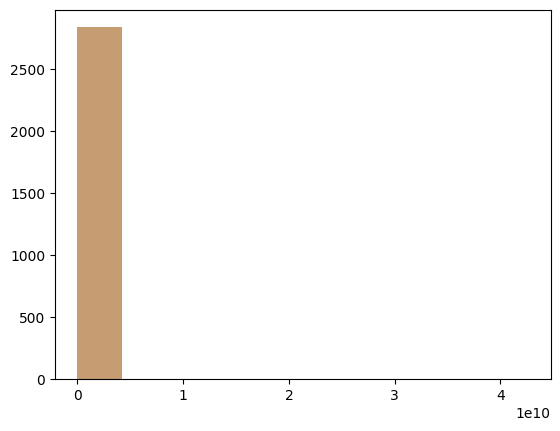

In [14]:
# Extract the relevant data
# plot the data where column Is Laundering is 1 and the amount on the axis and lable the axis with the amount


In [10]:
print(combined_data.columns)

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')


In [13]:
# display the amount received and amount paid columns when the Is Laundering column is 1 and sort it by amount received
display(combined_data[combined_data['Is Laundering'] == 1][['Amount Received', 'Amount Paid']].sort_values('Amount Received'))
#display(combined_data[combined_data['Is Laundering'] == 1][['Amount Received', 'Amount Paid']])

,Amount Received,Amount Paid
1377995,1.092500e-02,1.092500e-02
1455609,8.820000e-02,8.820000e-02
1429990,1.226250e-01,1.226250e-01
1501703,1.415980e-01,1.415980e-01
1440365,1.663430e-01,1.663430e-01
...,...,...
1448091,3.670707e+09,3.670707e+09
386899,3.710054e+09,3.710054e+09
1510365,5.160645e+09,5.160645e+09
768280,5.224114e+09,5.224114e+09


In [22]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from arango import ArangoClient

def load_bankingdata():
    # Specify the pattern to match CSV files (e.g., data_*.csv)

    #Concatenate all DataFrames into a single DataFrame
    data = connecto_to_arango()
    data = pd.DataFrame(data)
    data.drop(['_id', '_key', '_rev', '_from', '_to'], axis=1, inplace=True)
    print(data.columns)
    df = pd.get_dummies(data, columns=['payment_currency', 'receiving_currency', 'payment_format'], drop_first=True)
    # drop the columns that are not needed
    print(data.columns)
    df['amount'] = df['amount'].astype(float)
    df['hour'] = df['hour'].astype(float)
    df['day'] = df['day'].astype(int)
    X = df.drop(['is_laundering'], axis=1)
    y = df['is_laundering']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42, stratify=data['is_laundering'])
    return (X_train, y_train), (X_test, y_test)

def connecto_to_arango():
    client = ArangoClient(hosts="http://localhost:8529")
    db = client.db("Transactions", username=str("root"), password=str("Blogchain"))
    cursor =  db.aql.execute('FOR p IN transactions RETURN p', count=True)
    # get every document in the collection and return it as a list and parse it to a dataframe
    doc = [doc for doc in cursor]
    return doc

cleaned = load_bankingdata()

Index(['amount', 'receiving_currency', 'payment_currency', 'payment_format',
       'is_laundering', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'hour', 'day'],
      dtype='object')
Index(['amount', 'receiving_currency', 'payment_currency', 'payment_format',
       'is_laundering', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'hour', 'day'],
      dtype='object')


In [32]:
pd_cleaned = cleaned[0][0]
pd_cleaned 

,amount,monday,tuesday,wednesday,thursday,friday,saturday,sunday,hour,day,...,receiving_currency_UK Pound,receiving_currency_US Dollar,receiving_currency_Yen,receiving_currency_Yuan,payment_format_Bitcoin,payment_format_Cash,payment_format_Cheque,payment_format_Credit Card,payment_format_Reinvestment,payment_format_Wire
101210,688.227908,False,False,False,True,False,False,False,7.883333,8,...,True,False,False,False,False,False,True,False,False,False
74831,34955.022954,False,True,False,False,False,False,False,11.450000,6,...,False,False,False,False,False,False,True,False,False,False
47200,2567.900727,False,False,False,False,False,True,False,18.533333,3,...,False,False,False,False,False,False,False,True,False,False
127245,136.308691,False,False,False,False,True,False,False,22.550000,9,...,True,False,False,False,False,False,False,False,False,False
141685,4610.710829,True,False,False,False,False,False,False,2.083333,12,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125864,7365.986534,False,False,False,False,True,False,False,20.950000,9,...,False,False,False,False,False,False,False,False,False,True
67614,700.617498,True,False,False,False,False,False,False,22.766667,5,...,True,False,False,False,False,False,False,True,False,False
71297,88.784676,False,True,False,False,False,False,False,4.566667,6,...,True,False,False,False,False,True,False,False,False,False
105269,864.872649,False,False,False,True,False,False,False,14.566667,8,...,True,False,False,False,False,False,False,False,False,False


In [35]:
import matplotlib.pyplot as plt

# create a list of columns to plot
cols = ['amount', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'hour', 'day', 'receiving_currency_Euro', 'receiving_currency_Pound Sterling', 'receiving_currency_US Dollar', 'receiving_currency_Yen', 'receiving_currency_Yuan', 'payment_format_Bitcoin', 'payment_format_Cash', 'payment_format_Cheque', 'payment_format_Credit Card', 'payment_format_Reinvestment', 'payment_format_Wire']

# create a scatter plot for each column
for col in cols:
    plt.scatter(pd_cleaned[col], pd_cleaned['is_laundering'], alpha=0.5)
    plt.title(col + ' vs. Is Laundering')
    plt.xlabel(col)
    plt.ylabel('Is Laundering')
    plt.show()

KeyError: 'is_laundering'

KeyError: 'age'

KeyError: 'age'

In [36]:
import matplotlib.pyplot as plt

# create a list of columns to plot
cols = ['amount', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'hour', 'day', 'receiving_currency_Euro', 'receiving_currency_Pound Sterling', 'receiving_currency_US Dollar', 'receiving_currency_Yen', 'receiving_currency_Yuan', 'payment_format_Bitcoin', 'payment_format_Cash', 'payment_format_Cheque', 'payment_format_Credit Card', 'payment_format_Reinvestment', 'payment_format_Wire']

# create a scatter plot for each column
for col in cols:
    plt.scatter(pd_cleaned[col], pd_cleaned['Is Laundering'], alpha=0.5)
    plt.title(col + ' vs. Is Laundering')
    plt.xlabel(col)
    plt.ylabel('Is Laundering')
    plt.show()

KeyError: 'Is Laundering'